# Visualizing the Analytics > Forward Signup Data

In [1]:
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import tools
import pandas as pd
import numpy as np
# make plotly charts visible on jupyter notebook
pyo.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('https://github.com/RickPack/AnalyticsForward_2019/raw/master/AnalyticsForward_Registrations.csv')

In [4]:
df.head(3)

,id_name,event_date,false_creation_date_per_AF_year,creation_date_per_AF_year,id,name,yes_year,dates_yes,rsvp_yes_count,dates_yes_cumsum,days_to_event,yes_day,yes_month,dates_yes_otheryear,relative_today_cumsum,yes_year_factor
0,AF15,2015-03-14,2015-01-16,2015-01-16,219885748,Analytics Forward - An Unconference,2015,2015-01-16,3,3,57,16,1,2020-01-16,42,2015
1,AF15,2015-03-14,2015-01-16,2015-01-16,219885748,Analytics Forward - An Unconference,2015,2015-01-17,3,6,56,17,1,2020-01-17,42,2015
2,AF15,2015-03-14,2015-01-16,2015-01-16,219885748,Analytics Forward - An Unconference,2015,2015-01-18,1,7,55,18,1,2020-01-18,42,2015


In [5]:
df.groupby('id_name').max().days_to_event

id_name
AF15    57
AF16    43
AF17    48
AF18    59
AF19    37
Name: days_to_event, dtype: int64

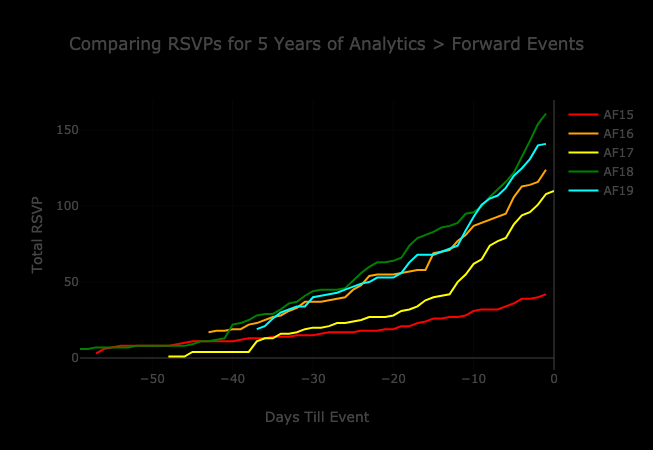

In [6]:
# get list of events
events = df.id_name.unique().tolist()
colors = ['red','orange','yellow','green','cyan']

# create plots
data = [go.Scatter(x=-(df[df.id_name == event].days_to_event), 
                   y=df[df.id_name == event].dates_yes_cumsum, 
                   name=event,
                   mode='lines',
                   marker=dict(color=color)) for event, color in zip(events, colors)]

layout = go.Layout(title='Comparing RSVPs for 5 Years of Analytics > Forward Events',
                   xaxis=dict(title='Days Till Event'),
                   yaxis=dict(title='Total RSVP'),
                   plot_bgcolor='black',
                   paper_bgcolor='black')

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)

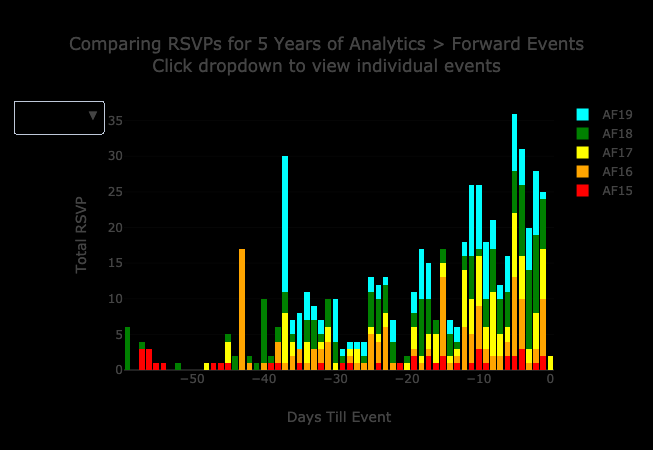

In [12]:
# get list of events
events = df.id_name.unique().tolist()
# define colors for each event trace
colors = ['red','orange','yellow','green','cyan']

# create list of menu items for the dropdown
menu_items = events
menu_items.append('View All')

# use identity matrix to define graph visibility options
visibility = np.identity(5).astype(bool).tolist()
#add a 'view all option'
visibility.append([True]*5)

# create plots
data = [go.Bar(x=-(df[df.id_name == event].days_to_event), 
                   y=df[df.id_name == event].rsvp_yes_count, 
                   name=event,
                   marker=dict(color=color)) for event, color in zip(events, colors)]

# set menu options for graph
updatemenus = list([
    dict(active=-1,
        buttons=list([ # start list comprehension
            dict(label = menu_items[i],
                 method = 'update',
                 args = [{'visible': visibility[i]},
                         {'title': 'Title'}]) 
             for i in range(len(menu_items))])
        )
])

layout = go.Layout(title='Comparing RSVPs for 5 Years of Analytics > Forward Events<br>Click dropdown to view individual events',
                   barmode='stack',
                   updatemenus=updatemenus,
                   xaxis=dict(title='Days Till Event'),
                   yaxis=dict(title='Total RSVP'),
                   plot_bgcolor='black',
                   paper_bgcolor='black')


fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)